In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

df=pd.read_csv('gdrive/My Drive/Colab Notebooks/Mall_Customers.csv')
df.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
df.isna()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
195,False
196,False
197,False
198,False


In [ ]:
dummy=pd.get_dummies(df['Gender']).astype(int)
df=pd.concat([df,dummy],axis=1)
df=df.rename(index=str, columns={"Female":"Female"})
df=df.drop('Male',axis=1)

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Female
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [ ]:
df=df.drop(columns=['Gender'])

In [ ]:
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Female
0,1,19,15,39,0
1,2,21,15,81,0
2,3,20,16,6,1
3,4,23,16,77,1
4,5,31,17,40,1


In [ ]:
X=df.drop(columns=['Spending Score (1-100)'],axis=0)
X

,CustomerID,Age,Annual Income (k$),Female
0,1,19,15,0
1,2,21,15,0
2,3,20,16,1
3,4,23,16,1
4,5,31,17,1
...,...,...,...,...
195,196,35,120,1
196,197,45,126,1
197,198,32,126,0
198,199,32,137,0


In [ ]:
kmean=KMeans(n_clusters=3)
kmean.fit(X)
kmean.cluster_centers_

array([[ 31.01639344,  36.91803279,  30.36065574,   0.60655738],
       [166.5       ,  36.04411765,  88.91176471,   0.54411765],
       [ 96.98591549,  43.1971831 ,  59.35211268,   0.53521127]])

In [ ]:
labels=kmean.labels_
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.49392754910189185


Cluster 1 Inertia 842808.0600000005
Cluster 2 Inertia 254375.02790279005
Cluster 3 Inertia 138695.51832474925
Cluster 4 Inertia 95392.76089176611
Cluster 5 Inertia 74137.74561043933
Cluster 6 Inertia 63059.42027414789
Cluster 7 Inertia 54086.4678022935
Cluster 8 Inertia 45022.456197905434
Cluster 9 Inertia 38815.75146961386
Cluster 10 Inertia 35115.50914631345
Cluster 11 Inertia 30838.113037983338
Cluster 12 Inertia 27604.32224691465
Cluster 13 Inertia 25322.110992875416
Cluster 14 Inertia 23569.63306972439
Cluster 15 Inertia 21951.312295221112
Cluster 16 Inertia 19747.95592740593
Cluster 17 Inertia 18756.71013708513
Cluster 18 Inertia 17402.284389221884
Cluster 19 Inertia 15499.842185592177


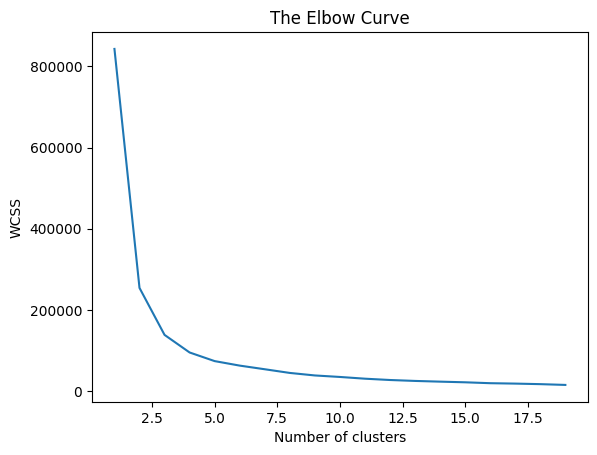

In [ ]:
wcss = []
for i in range(1,20):
 kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
 kmeans.fit(X)
 wcss.append(kmeans.inertia_)
 print("Cluster", i, "Inertia", kmeans.inertia_)
plt.plot(range(1,20),wcss)
plt.title('The Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(X)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.5638072620572387


In [ ]:
kmeans.cluster_centers_

array([[ 50.        ,  39.94949495,  39.34343434,   0.5959596 ],
       [150.        ,  37.77227723,  81.35643564,   0.52475248]])

In [ ]:
print("\nCluster Centroids:")
for i, centroid in enumerate(kmeans.cluster_centers_):
    print(f"Centroid {i}: {centroid}")


Cluster Centroids:
Centroid 0: [50.         39.94949495 39.34343434  0.5959596 ]
Centroid 1: [150.          37.77227723  81.35643564   0.52475248]


In [ ]:
centroid=kmeans.cluster_centers_

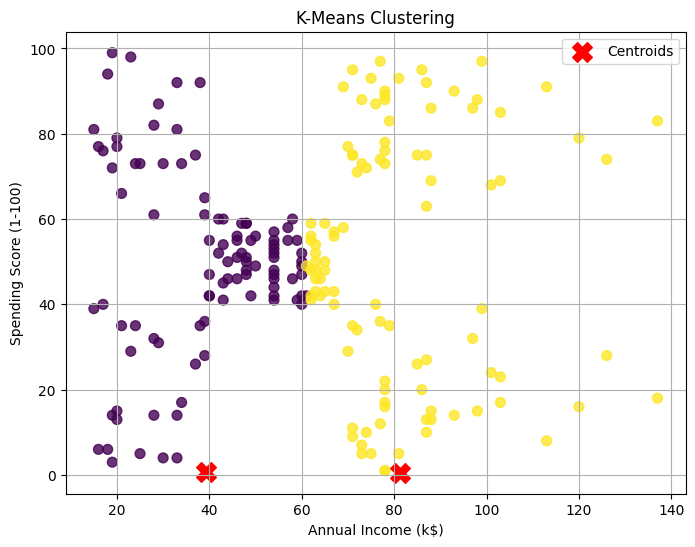

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=labels, cmap='viridis', s=50, alpha=0.8)

plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], c='red', marker='X', s=200, label='Centroids')

plt.title('K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
for n_cluster in range(2,10):
 kmeans = KMeans(n_clusters=n_cluster, random_state=42)
 cluster_labels = kmeans.fit_predict(X)
 silhouette_avg = silhouette_score(X, cluster_labels)
 print(f"clusters:{n_cluster}, Silhouette Score: {silhouette_avg}")

clusters:2, Silhouette Score: 0.5638072620572387
clusters:3, Silhouette Score: 0.49392754910189185
clusters:4, Silhouette Score: 0.4356419077082991
clusters:5, Silhouette Score: 0.4074087838138116
clusters:6, Silhouette Score: 0.370540403157963
clusters:7, Silhouette Score: 0.37029182161228646
clusters:8, Silhouette Score: 0.38168929795580836
clusters:9, Silhouette Score: 0.3792756593027696


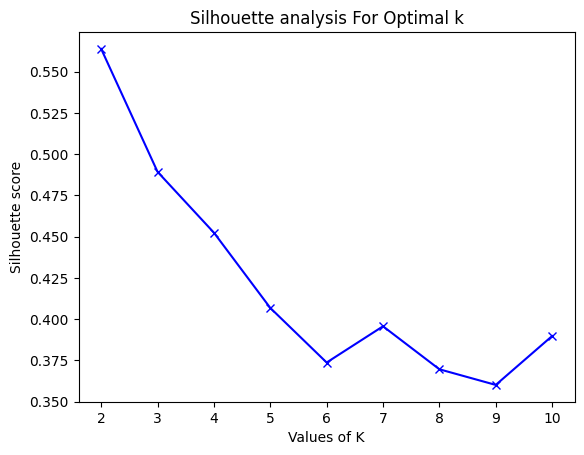

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7,8 ,9,10]
silhouette_avg = []
for num_clusters in range_n_clusters:

 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(X)
 cluster_labels = kmeans.labels_

 silhouette_avg.append(silhouette_score(X, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()